# World Endangered Languages

## Introduction
The data that matched our common interest was the Geographical Spread of Endangered Languages. 
It surprised us the number of languages in the world today that are at risk of extinction.
The data shows the location, number of speakers, and some identifying categories used by those who study languages.

The United Nations Education, Scientific and Cultural Organization (UNESCO) classifies language endangerment as:
1. Vulnerable: most children speak the language, but it may be restricted to certain domains (e.g., home)
2.  Definitely endangered: children no longer learn the language as a 'mother tongue' in the home 
3. Severely endangered: language is spoken by grandparents and older generations; while the parent generation may understand it, they do not speak it to children or among themselves
4. Critically endangered: the youngest speakers are grandparents and older, and they speak the language partially and infrequently
5. Extinct: there are no speakers left 

### Objective
Our overall goal is to understand the global distribution of languages at risk of extinction and where the risks are more prominent.

### Hypothesis

One hypothesis we postulate is that most endangered languages fall outside the developed western counties, and mainly in the global southern hemisphere.

#### Source:
https://www.kaggle.com/code/hanyan/geographical-spread-of-endangered-language/data?select=data.csv

In [314]:
import pandas as pd

In [315]:
df = pd.read_csv('/Users/carolinabarragan/Downloads/data.csv')

## Data Exploration and Preparation

This section constitutes the bulk of the project.
It explores the dataset using Pandas, cleans it, adds additional values, and provides some visualizations.

### Basic Information about the Dataset

As the below `info()` method shows, there are 2722 entries and 15 columns.
Any column with fewer than 2722 non-null entries could cause a problem for our analysis.
For instance, while there is an entry under "Degree of endangerment" for every row; this is not the case for the "Number of speakers" column.

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2722 non-null   int64  
 1   Name in English              2722 non-null   object 
 2   Name in French               2699 non-null   object 
 3   Name in Spanish              2701 non-null   object 
 4   Countries                    2721 non-null   object 
 5   Country codes alpha 3        2721 non-null   object 
 6   ISO639-3 codes               2458 non-null   object 
 7   Degree of endangerment       2722 non-null   object 
 8   Alternate names              1583 non-null   object 
 9   Name in the language         27 non-null     object 
 10  Number of speakers           2539 non-null   float64
 11  Sources                      2079 non-null   object 
 12  Latitude                     2719 non-null   float64
 13  Longitude         

In [317]:
df.head()

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


### Deal with Duplicates

By comparing the number of entries (2722) with the number of unique names under 'Names in English' (2715), we should expect 7 duplicates.
Sure enough, checking for duplicates of the same language name returns 7 duplicates.

Taking the first, Aka, as our example, we see that the ISO639 codes are different.
"hru" (https://iso639-3.sil.org/code/hru) refers to the [Hruso language](https://en.wikipedia.org/wiki/Hruso_language).
And "soh" (https://iso639-3.sil.org/code/soh) refers to the [Sillok language](https://en.wikipedia.org/wiki/Sillok_language).
Both are also known as "Aka."
We suspect the countries were incorrectly entered because Hruso (hru) is spoken in India, and "Sillok (Aka)" (soh) in Sudan; whereas the csv dataset associates the "soh" Ako with India and the "hru" Ako with both Sudan and India.
The names listed under "Alternate names" also correspond with the country codes.
The 'Number of speakers' column gives another clue: while 300 speakers for Sillok corresponds to a 1983 source listed on Wikipedia, the 4,000 speakers for Hruso does not match the 3,000 listed from a 2007 source on Wikipedia (we do not have access to the Ethnologue website database).

In [318]:
df['Name in English'].size

2722

In [319]:
df['Name in English'].nunique()

2715

In [320]:
df[df["Name in English"].duplicated(keep='first')]

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
1525,1690,Aka,aka,aka,India,IND,soh,Critically endangered,Jebel Sillok,NaN,300.0,"Bender, Ethnologue",11.0112,34.2333,NaN
1640,1683,Karo,karo,karo,Ethiopia,ETH,kxh,Critically endangered,NaN,NaN,200.0,Moges Yigezu,5.2003,36.0681,NaN
1713,2577,Wari,wari,wari,Indonesia,IDN,wbe,Definitely endangered,"Waritai, Weretai",NaN,150.0,"Wurm, Stephen A. 2007. 'Australia and the Paci...",-3.2173,138.4497,Irian Jaya
2315,17,Boro,boro,karaboro,"Ethiopia, Togo","ETH, TGO",NaN,Extinct,NaN,NaN,0.0,Roger Blench,8.6244,0.6262,NaN
2473,551,Pyu,pyu,pyu,Myanmar,MMR,NaN,Extinct,NaN,NaN,0.0,NaN,18.9424,94.8751,NaN
2530,849,Yuki,yuki,yuki,United States of America,USA,yuk,Extinct,NaN,NaN,0.0,"Victor Golla, Ives Goddard, Lyle Campbell, Mar...",37.4336,-118.5908,Formerly spoken in several dialects along the ...
2607,2723,Koro,koro,koro,India,IND,NaN,Definitely endangered,Koro Aka\n,Koro,NaN,"Ethnologue, National Geographic",27.1667,92.6312,Several villages in East Kameng District of th...


In [321]:
df.loc[df['Name in English'] == 'Aka', :]

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
769,1097,Aka,aka,aka,"India, Sudan","IND, SDN",hru,Definitely endangered,"Hruso, Hrusso, Akha",NaN,4000.0,NaN,27.1666,92.6312,Bichom valley in West Kameng Dt
1525,1690,Aka,aka,aka,India,IND,soh,Critically endangered,Jebel Sillok,NaN,300.0,"Bender, Ethnologue",11.0112,34.2333,NaN


In [322]:
# Change the names and countries
df.iloc[769,[1,4]] = ['Hruso', 'India']
df.iloc[1525,[1,4]] = ['Sillok', 'Sudan']

For the rest of the duplicates, let's just number them.
We can run a loop through each of the language names and then through each of the rows with them, adding an iterating integer to the end.

In [323]:
duplicate_langs = ['Karo', 'Wari', 'Boro', 'Pyu', 'Yuki', 'Koro']

In [324]:
# Here are the rows before:
df.loc[df['Name in English'].isin(duplicate_langs), :]

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
405,1680,Boro,boro,boro,NaN,NaN,bwo,Definitely endangered,Shinasha,NaN,19878.0,"Census, Zelealem Leyew",10.3581,35.0024,NaN
883,663,Wari,wari,tubarão/ huarí,Brazil,BRA,pav,Definitely endangered,"Pacaás Novos, Pakaa Nova",NaN,2721.0,"Moore, 2008.",-11.7275,-65.0061,NaN
1614,1617,Karo,káro,karo,Brazil,BRA,arr,Vulnerable,"Arara, Arara Karo, Arara de Rondônia, Arara Tu...",NaN,208.0,"www.socioambiental.org\nMoore, 2008, IBGE data...",-10.5749,-61.5893,The group lives in the southern part of the in...
1640,1683,Karo,karo,karo,Ethiopia,ETH,kxh,Critically endangered,NaN,NaN,200.0,Moges Yigezu,5.2003,36.0681,NaN
1683,2512,Koro,koro,koro,Vanuatu,VUT,krf,Definitely endangered,NaN,NaN,160.0,Alexandre François 2008\nhttp://alex.francois....,-14.3242,167.4728,Gaua Island
1713,2577,Wari,wari,wari,Indonesia,IDN,wbe,Definitely endangered,"Waritai, Weretai",NaN,150.0,"Wurm, Stephen A. 2007. 'Australia and the Paci...",-3.2173,138.4497,Irian Jaya
1734,666,Yuki,yuki,yuquí,Bolivia (Plurinational State of),BOL,yuq,Severely endangered,Yuqui,NaN,125.0,"Crevels et alii, 'Current Stidies on South Ame...",-16.2463,-65.0061,Province of Chapare (Cochabamba) and Ichilo (S...
1789,2123,Pyu,pyu,pyu,Indonesia,IDN,pby,Severely endangered,NaN,NaN,100.0,NaN,-4.5000,140.9000,Irian Jaya
2315,17,Boro,boro,karaboro,"Ethiopia, Togo","ETH, TGO",NaN,Extinct,NaN,NaN,0.0,Roger Blench,8.6244,0.6262,NaN
2473,551,Pyu,pyu,pyu,Myanmar,MMR,NaN,Extinct,NaN,NaN,0.0,NaN,18.9424,94.8751,NaN


In [325]:
df.loc[df['Name in English'] == 'Karo', 'Name in English'].count()

2

In [326]:
# Initially, I was trying to loop through, where row_count is the number of rows
# with the current duplicate language name.

#    for i in range(row_count):
#        df.loc[df['Name in English'] == lang, 'Name in English'] = lang + '_' + str(i)

# However, this does not work because it renames all the rows at once.
# And  upon looping through the next i value, the 'Name in English' columns no longer == lang.
# Instead, it needs to go one by one, which can be accomplished via the ID number (column 0).

# for each language name, get its ID
    # rename the language using an integer, which is reset at the top loop
for lang in duplicate_langs:
    lang_IDs = df.loc[df['Name in English'] == lang, 'ID']
    i = 0
    for id_num in lang_IDs:
        df.loc[df['ID'] == id_num, 'Name in English'] = lang + '_' + str(i)
        i += 1

In [327]:
# Now there are no duplicate language rows:
df[df["Name in English"].duplicated(keep='first')]

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location


In [328]:
# Here, for example, is what the two Karo rows now look like:
df.loc[(df['Name in English'] == 'Karo_0') | (df['Name in English'] == 'Karo_1'), :]

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
1614,1617,Karo_0,káro,karo,Brazil,BRA,arr,Vulnerable,"Arara, Arara Karo, Arara de Rondônia, Arara Tu...",NaN,208.0,"www.socioambiental.org\nMoore, 2008, IBGE data...",-10.5749,-61.5893,The group lives in the southern part of the in...
1640,1683,Karo_1,karo,karo,Ethiopia,ETH,kxh,Critically endangered,NaN,NaN,200.0,Moges Yigezu,5.2003,36.0681,NaN


### Removing unnecessary columns

The following columns are unnecessary for our analysis:
1. ID
2. Name in French
3. Name in Spanish
4. Country codes alpha 3
5. ISO639-3 codes
6. Alternate names
7. Name in the language
8. Sources

Of these columns, 1–7 are redundant for our purposes, and 8 has no bearing on the geographical distribution of languages and their degree of endangerment.
And while "Description of the location" is not conducive to statistical analysis, we'll keep them there in case we want to get more qualitative information about the location.

So let's delete them from our dataframe.

After that, we can set the "Name in English" column to the index for the dataframe.

In [329]:
# del df['ID'] works, but we need to go one by one
# Instead, we can use the drop() method supplied by Pandas
df.drop(['ID', 'Name in French', 'Name in Spanish', 'Country codes alpha 3', 
        'ISO639-3 codes', 'Alternate names', 'Name in the language', 'Sources'],
         axis=1, inplace=True)

In [330]:
df.head()  # Much cleaner now

,Name in English,Countries,Degree of endangerment,Number of speakers,Latitude,Longitude,Description of the location
0,South Italian,Italy,Vulnerable,7500000.0,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,Sicilian,Italy,Vulnerable,5000000.0,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...",Vulnerable,4800000.0,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...",Vulnerable,4000000.0,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,Lombard,"Italy, Switzerland",Definitely endangered,3500000.0,45.7215,9.3273,the region of Lombardy (except the southernmos...


### Features of a Language

The dataset has three features two consider: location, its degree of endangerment, and number of speakers.
Location can be investigated via both country and the paired latitude and longitude columns.
Let's start with endangerment and speakers.

#### "Degree of endangerment" and "Number of speakers"

First, we create two conditionals for checking the rows in two columns: the 'Number of speakers' column and the 'Degree of endangerment' column.
We'll see why we made one for the number of speakers in a moment.

In [331]:
no_speakers = df['Number of speakers'] == 0
extinct_langs = df['Degree of endangerment'] == 'Extinct'
# Another way to get the extinct languages is with
# df.loc[df['Degree of endangerment'].isin(['Extinct']), :]

Let's take a look at how many of the Extinct languages have speakers.

In [332]:
df.loc[extinct_langs & (df.loc[:, 'Number of speakers'] > 0),['Name in English', 'Number of speakers']]

,Name in English,Number of speakers
485,Tobada',12000.0
1040,Tamazight (Ait Rouadi),1637.0
2221,Canichana,3.0
2269,Lae,1.0
2277,Uru,1.0


In [333]:
# Languages with 0 speakers tallied by endangerment status:
df.loc[no_speakers, 'Degree of endangerment'].value_counts()

Extinct                  239
Critically endangered     12
Definitely endangered      4
Severely endangered        1
Vulnerable                 1
Name: Degree of endangerment, dtype: int64

The above cell reveals another problem: some of the languages that are not extinct have zero speakers.
The next cell confirms this.

In [334]:
# Here are those 18 non-extinct languages with zero speakers.
# This is another limitation of this dataset.
df.loc[no_speakers & ~extinct_langs, :]

,Name in English,Countries,Degree of endangerment,Number of speakers,Latitude,Longitude,Description of the location
2304,Badala,Australia,Critically endangered,0.0,-25.2850,153.1054,NaN
2306,Baga Mboteni,Guinea,Critically endangered,0.0,10.7415,-14.5513,NaN
2332,Dharug,Australia,Critically endangered,0.0,-34.0344,150.9301,NaN
2333,Dhurga,Australia,Critically endangered,0.0,-35.4964,150.2490,NaN
2344,Eliri,Sudan,Severely endangered,0.0,4.5706,30.8580,NaN
2350,Garífuna (Nicaragua),Nicaragua,Critically endangered,0.0,12.5666,-83.7166,Orinoco in the Regiones Atlánticas Autónomas d...
2359,Gyasumdo,Nepal,Definitely endangered,0.0,28.5969,84.2253,lower Manang valley
2372,Jorá,Bolivia (Plurinational State of),Critically endangered,0.0,-14.0246,-63.3581,NaN
2390,Khaccaḍ Bhoṭe,Nepal,Definitely endangered,0.0,28.1113,85.3674,"Dhāibuṅ area, northeast of Nuvākoṭ"
2406,Langthang Tibetan,Nepal,Definitely endangered,0.0,28.2100,85.5697,"near ’Langthang Himāl, in the northern part of..."


### Visualizing speakers and endangered languages

The next two plots visualize:
1. how many speakers belong to each language grouped by their 'Degree of endangerment'
2. how many languages belong to each 'Degree of endangerment' designation.

In [335]:
import plotly.express as px
%matplotlib inline

In [336]:
px.strip(df, x='Number of speakers', color='Degree of endangerment',
         hover_name='Name in English', height=500)

In [337]:
px.histogram(df, x='Degree of endangerment', color='Degree of endangerment', hover_name='Name in English')

### "Countries"

In our later analysis, we may want to group by country.
However, not all values under the "Countries" column are a single country.
Many are lists of multiple countries.
So the next step of data clean up is to split listed countries into their own series that can be used to establish a 'Continent' column of values.

In the code below:

#### Line 1

First, `apply(pd.Series)`: this converts the lists of separate strings (individual country names) into column values.
Second, `stack()` converts these columns into rows with the column numbers now set to the 0th column.
Thus `s` goes from a DataFrame to a Series (with a MultiIndex).

#### Line 2

However, we ultimately won't need that 0th column of numbers.
So `s.index.droplevel(-1)` removes them.
After playing with it, I determined that negative numbers refer to the MultiIndex columns.
- 0 refers to the first column of dataset values.
- -1 refers to the right-most (or last) index.
- -2 goes one more to the right (or the next level up) index.

So the idea here is to have a Series (of the single country names) with an index that matches the base dataframe.

According to [[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html][the docs]], `pandas.DataFrame.droplevel` takes two parameters: /level/ and /axis=0/.
For /axis/, "0 or 'index': remove level(s) in column" and "1 or 'columns': remove level(s) in row."
In other words, you name what you want to remove and then say whether it's a column (default, 0) or a row (1).

#### Lines 3 and onwards

Line 3 adds a name to the Series designated by `s`, which will become its column name once joined with the base DataFrame.
The following lines remove the original column of countries and replace it with the new one.

In [338]:
s = df['Countries'].str.split(',').apply(pd.Series).stack()
s.index = s.index.droplevel(-1)  # to line up with df's index
s.name = 'Country'  # needs a name before it can join


#del df['Countries']
df.drop('Countries', axis=1, inplace=True)

# add new column of separated country names to the dataframe
df = df.join(s)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3074 entries, 0 to 2721
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name in English              3074 non-null   object 
 1   Degree of endangerment       3074 non-null   object 
 2   Number of speakers           2810 non-null   float64
 3   Latitude                     3071 non-null   float64
 4   Longitude                    3071 non-null   float64
 5   Description of the location  2161 non-null   object 
 6   Country                      3073 non-null   object 
dtypes: float64(3), object(4)
memory usage: 192.1+ KB


As the DataFrame's info() shows, adding separate country rows increases the number of values, but not the number of row indices.
This is necessary for the next step: grouping by country.
However, when checking for Continent belonging, it will be necessary to add a 'Continent' column in order to avoid counting the same language for as many 'Country' values as it has that belong to a continent's list of countries.

### Groupby Countries

It could be of interest to consider endangered languages within a single country, which is possible with the cleaned up "Country" column.
The next few cells create this groupby object and show some sample manipulations.

In [340]:
country_langs = df.groupby(by='Country')

In [341]:
# How many languages are there in each "Degree of endangerment" in, for example, Albania?
country_langs['Degree of endangerment'].value_counts().loc['Albania']

Degree of endangerment
Definitely endangered    2
Severely endangered      1
Vulnerable               1
Name: Degree of endangerment, dtype: int64

In [342]:
# How many "Severely endangered" languages are in each recorded country?
country_langs['Degree of endangerment'].apply(lambda x: x.str.contains('Severely endangered').sum())

Country
 Afghanistan                          2
 Algeria                              1
 Austria                              0
 Belarus                              0
 Belgium                              0
                                     ..
Vanuatu                               3
Venezuela (Bolivarian Republic of)    5
Viet Nam                              2
Western Sahara                        0
Yemen                                 1
Name: Degree of endangerment, Length: 226, dtype: int64

In [343]:
# Let's look at the endangered languages spoken in Yemen:
country_langs.get_group('United States of America')

# This is the same as:
# df.loc[df['Countries'] == 'United States of America', :]

,Name in English,Degree of endangerment,Number of speakers,Latitude,Longitude,Description of the location,Country
156,Navajo,Vulnerable,120000.0,35.8044,-108.4750,the Navajo Nation is located in the region of ...,United States of America
359,Sioux,Vulnerable,25000.0,43.0588,-102.5244,The Santee-Sisseton (Dakota) dialect is spoken...,United States of America
443,O'odham (Akimel),Definitely endangered,15000.0,33.0590,-112.0479,The Akimel O'odham dialect is spoken on the Gi...,United States of America
444,O'odham (Tohono),Definitely endangered,15000.0,31.9186,-111.8798,The Tohono O'odham dialect is spoken on the To...,United States of America
502,Central Alaskan Yupik (2),Vulnerable,10400.0,61.4387,-160.4882,NaN,United States of America
...,...,...,...,...,...,...,...
2639,Munsee (United States of America),Critically endangered,NaN,40.8969,-76.3769,NaN,United States of America
2663,Quinault,Extinct,NaN,47.3332,-124.2864,"Quinault Reservation, Taholah, WA",United States of America
2681,Southern Paiute,Severely endangered,NaN,37.6818,-113.0880,Southern Paiute is spoken in ten communities i...,United States of America
2706,Unami,Extinct,NaN,39.1300,-76.0253,NaN,United States of America


In [344]:
# How many extinct languages are in, say, Canada?
country_langs.get_group('Canada')['Degree of endangerment'].isin(['Extinct']).sum()

2

### Latitude and Longitude

Another potentially interesting piece of information is in which hemisphere these languages are located.
Additionally, in which hemisphere are most speakers of endangered languages located?
To calculate these, we can rely on the values of the "Latitude" column.

However, with the modified "Country" column, some languages are listed multiple times.
So we need to take into account those duplicates when counting the number of rows.

In [345]:
print("Number of languages above the equator:",df.loc[df['Latitude']>0, 'Name in English'].nunique())
print("Number of languages below the equator:",df.loc[df['Latitude']<0, 'Name in English'].nunique())
print("Number of languages on the equator:",df.loc[df['Latitude']==0, 'Name in English'].nunique())
print("Number of languages without latitude value:",df.loc[df['Latitude'].isnull(), 'Name in English'].nunique())

Number of languages above the equator: 1922
Number of languages below the equator: 795
Number of languages on the equator: 2
Number of languages without latitude value: 3


That's all 2722 languages accounted for.

### Interactive map with hover info

The two cells below work to plot a world map of the languages' locations.
The first cell provides a variable that can be adjusted in order to determine which langauges are plotted.
It is initially set to Extinct.
The other options are: Vulnerable, Definitely endangered, Severely endangered, Critically endangered.
The second cell uses the `px` object imported above to plot.

In [346]:
# change this variable to change what is plotted
df_to_plot = df.loc[df['Degree of endangerment'] == "Severely endangered", :]

In [347]:
fig = px.scatter_geo(df_to_plot, lat='Latitude', lon='Longitude', hover_name='Name in English')
fig.update_layout(title = 'Endangered Languages', title_x=0.5)  # Centers the given title
#fig.show(renderer='firefox')  # can open in browser by specifying renderer

### Finding Languages by Continent

In the event that we want to get a sense of the distribution of variously endangered languages by continent, we will need to create lists of countries by continent.
The values of 'Country' may then be checked against these lists.

After assigning a continent to each language, there are two problems that will be addressed:
1. overwriting the continent
2. not assigning every language a continent

In [348]:
continent_lists = {
    "North America": ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 
       'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 
       'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 
       'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 
       'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 
       'United States of America'],
    "South America": ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
       'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    "Europe": ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Republic of Ireland',
       'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'],
    "Africa": ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'],
    "Asia": ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus',
       'East Timor', 'Egypt', 'Georgia', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia',
       'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine',
       'Philippines', 'Qatar', 'Russian Federation', 'Saudi Arabia', 'Singapore',
       'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
       'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
       'Uzbekistan', 'Vietnam', 'Yemen'],
    "Australia": ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands',
        'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
        'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
}

In [349]:
# To illustrate, let's look at all the languages in South America
df.loc[df['Country'].isin(continent_lists['South America']), ['Name in English', 'Degree of endangerment', 'Country']]

,Name in English,Degree of endangerment,Country
28,Quechua of Cuzco,Vulnerable,Peru
38,Quechua of Ayacucho,Definitely endangered,Peru
54,Quechua of Ancash and Huánuco,Definitely endangered,Peru
81,Mapuche (Chile),Definitely endangered,Chile
89,Guajiro,Vulnerable,Colombia
...,...,...,...
2704,Tuyuca (Colombia),Definitely endangered,Colombia
2710,Wanano / Kotiria (Colombia),Definitely endangered,Colombia
2713,Wichi,Vulnerable,Argentina
2718,Yucuna,Definitely endangered,Colombia


In [350]:
# Now let's add a 'Continent' column.
# This enables grouping by Continent instead of needing to check everytime.

# List of keys for the country names per continent dict:
continent_names = ['Africa', 'Asia', 'Australia', 'Europe', 'North America', 'South America']

for continent in continent_names:
    df.loc[df['Country'].isin(continent_lists[continent]), 'Continent'] = continent

#### What about countries in multiple continents?

For languages spoken in countries that are found in different continents, the above method presents a problem:
the last confirmed continent will overwrite the previous one.
To check, we create six dataframes, one per continent, then join them together, and finally check for duplicates.
We can only flag this problem and do not provide a solution because it is a minor issue for our analysis.

In [351]:
# Note that the second lines of these code blocks return a SettingWithCopyWarning.
# However, since this is what we were told to do in Week 2 for setting specific values in a DataFrame,
# we are overlooking that warning.

africa_df = df.loc[df['Country'].isin(continent_lists['Africa']), :]
africa_df.loc[:, 'Continent'] = 'Africa'

asia_df = df.loc[df['Country'].isin(continent_lists['Asia']), :]
asia_df.loc[:, 'Continent'] = 'Asia'

australia_df = df.loc[df['Country'].isin(continent_lists['Australia']), :]
australia_df.loc[:, 'Continent'] = 'Australia'

europe_df = df.loc[df['Country'].isin(continent_lists['Europe']), :]
europe_df.loc[:, 'Continent'] = 'Europe'

north_america_df = df.loc[df['Country'].isin(continent_lists['North America']), :]
north_america_df.loc[:, 'Continent'] = 'North America'

south_america_df = df.loc[df['Country'].isin(continent_lists['South America']), :]
south_america_df.loc[:, 'Continent'] = 'South America'

/Users/carolinabarragan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [352]:
# create a DataFrame by concatenating the six continental DataFrames
check_continents_df = pd.concat([africa_df, asia_df, australia_df, europe_df,
                                 north_america_df, south_america_df], ignore_index=True)

In [353]:
# There are 2527 languages listed in this manner.
check_continents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name in English              2527 non-null   object 
 1   Degree of endangerment       2527 non-null   object 
 2   Number of speakers           2349 non-null   float64
 3   Latitude                     2524 non-null   float64
 4   Longitude                    2524 non-null   float64
 5   Description of the location  1766 non-null   object 
 6   Country                      2527 non-null   object 
 7   Continent                    2527 non-null   object 
dtypes: float64(3), object(5)
memory usage: 158.1+ KB


In [354]:
# Checking for the number of duplicates shows there are 35 languages with multiple continents.
check_continents_df[check_continents_df['Name in English'].duplicated()]['Name in English'].count()

35

35 languages are duplicated via this method of assigning a continent value.
For each of these languages, the data analyst could manually decide which continent is more appropriate.
Or they could decide to assign both continent values in a manner akin to the conversion of the original `Countries` column into the new `Country` column.

#### Missing Languages

Unfortunately, not all languages have been accounted for.
Since only one language has a null entry for the original "Countries" column, there ought to be a total of 2721 languages.
But there are only 2492 languages provided by the `df.groupby('Continent)` group.
This means that 229 languages have countries that are not found in the `continent_lists` dictionary's included country names.
To determine which ones are in error, one could create a single list of all the countries and run the following:
```
# Create the list of countries
all_countries_list = []
for continent in continent_names:
    all_countries_list.append(continent_lists[continent])

# Show languages without a corresponding country
print(df.loc[~df['Country'].isin(all_countries_list), 'Name in English])
```

For this project, we will not manually check each of these 229 countries.
But we would expect to find either a missing country or, what is more likely, a difference in spelling.
Two differences we caught when compiling the dictionary of lists were "Russia" and "Congo, The Republic of".
In the dataset, these are "Russian Federation" and "Congo".

In [355]:
# Count the number of names for each continent, then sum those values:
df.groupby('Continent')['Name in English'].count().sum()

2492

### Visualizing Languages by Continent

For a visual comparison of endangered languages by continent, let's start with some bar graphs.
First, we will show the total number of languages by continent.
Second, we will look at "Degrees of endangerment" values for each continent.

After this, we can use a histogram to check for the likelihood that a language is extinct depending on the continent where it is (no longer) spoken.

In [356]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Continent'>

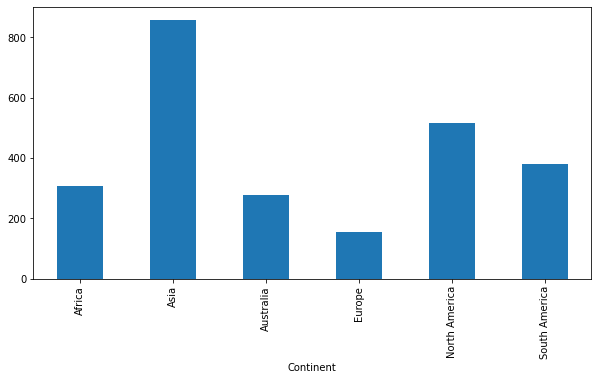

In [357]:
fig, axs = plt.subplots(1,1, figsize=(10,5))

langs_total = df.groupby(by='Continent')['Name in English'].nunique()
langs_total.plot(kind='bar', ax=axs)

### Plotting all degrees of endangerment across continents

To plot the number of languages by their degree of endangerment for each continent, we convert the "Degree of endangerment" column to binary values using dummy encoding columns.

In [358]:
endangered_dummies = pd.get_dummies(df[['Degree of endangerment']])

In [359]:
# For legibility and reference, let's rename those dummy encoded columns:
endangered_dummies.rename(columns = {'Degree of endangerment_Critically endangered': 'Critically endangered',
                               'Degree of endangerment_Definitely endangered': 'Definitely endangered',
                               'Degree of endangerment_Extinct': 'Extinct',
                               'Degree of endangerment_Severely endangered': 'Severely endangered',
                               'Degree of endangerment_Vulnerable': 'Vulnerable'}, inplace = True)

In [360]:
# List of the values for "Degree of endangerment"
degrees = ['Vulnerable', 'Definitely endangered', 'Critically endangered', 'Severely endangered', 'Extinct']

In [361]:
# Change order for the sake of legibility to go from "Vulnerable" to "Extinct"
endangered_dummies = endangered_dummies[degrees]

In [362]:
# Check our work
endangered_dummies.head()

,Vulnerable,Definitely endangered,Critically endangered,Severely endangered,Extinct
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
2,1,0,0,0,0
2,1,0,0,0,0


#### Getting rid of duplicate dummies

Due to the way the rows are indexed after modifying the "Country" column, when merging this dummy DataFrame to our main DataFrame, it will duplicate even further.
This happens because the `join()` process goes row-by-row according to the index.
Each language has the same index.

"Low Saxon" (index = 2), for example, has 5 rows (b/c of five different values for the "Country" column).
The `join()` method starts with the first row of index = 2 in "df", and it applies all rows in "endangered_dummies" with a matching row index to it.
This repeats for each row.
After joining "endangered_dummies", it has five rows for each of those five, totalling 25 rows.

To deal with this excessive duplication, there are a couple of options.
One would be to use the drop_duplicates() method on the resulting dataframe.
Or, we could just eliminate them in the dataframe of the dummy values with `.index.duplicated(keep='first)`.
This bit of code returns an array of booleans: `True` for duplicate values, otherwise `False`.
Using bracket selection on the dataframe, we can negate all those True duplicates with a tilde: `~`

In [363]:
# Eliminate duplicates by row index.
endangered_dummies = endangered_dummies[~endangered_dummies.index.duplicated(keep='first')]

In [364]:
# Join dummy encoded values with the dataframe to create a new one.

# The first line joins only those necessary columns from our dataset, dropping the rest.
endangered_df = df.drop(['Degree of endangerment', 'Number of speakers', 'Description of the location'], axis=1)
endangered_df = endangered_df.join(endangered_dummies)

In [365]:
# Check our work:
endangered_df.loc[df['Name in English'] == 'Low Saxon', :]

,Name in English,Latitude,Longitude,Country,Continent,Vulnerable,Definitely endangered,Critically endangered,Severely endangered,Extinct
2,Low Saxon,53.4029,10.3601,Germany,Europe,1,0,0,0,0
2,Low Saxon,53.4029,10.3601,Denmark,NaN,1,0,0,0,0
2,Low Saxon,53.4029,10.3601,Netherlands,NaN,1,0,0,0,0
2,Low Saxon,53.4029,10.3601,Poland,NaN,1,0,0,0,0
2,Low Saxon,53.4029,10.3601,Russian Federation,NaN,1,0,0,0,0


In [366]:
# To sum each of the degrees of endangerment columns for each continent,
# loop through each of the five "degrees" for each continent.

# But first: let's make sure that it isn't logging the same langauge multiple times
# (once per 'Country' entry). We'll check for the number of Vulnerable languages in Europe
# because we know that "Low Saxon" has five entries for those conditions.
endangered_df.loc[endangered_df['Country'].isin(continent_lists['Europe']), ['Vulnerable']].sum()

Vulnerable    25
dtype: int64

In [367]:
# Now compare that number to the base dataframe using the .size attribute.
df.loc[(df['Country'].isin(continent_lists['Europe'])) & (df['Degree of endangerment'].isin(['Vulnerable'])), 'Name in English'].size

25

It's the same, which means we're ready to plot.

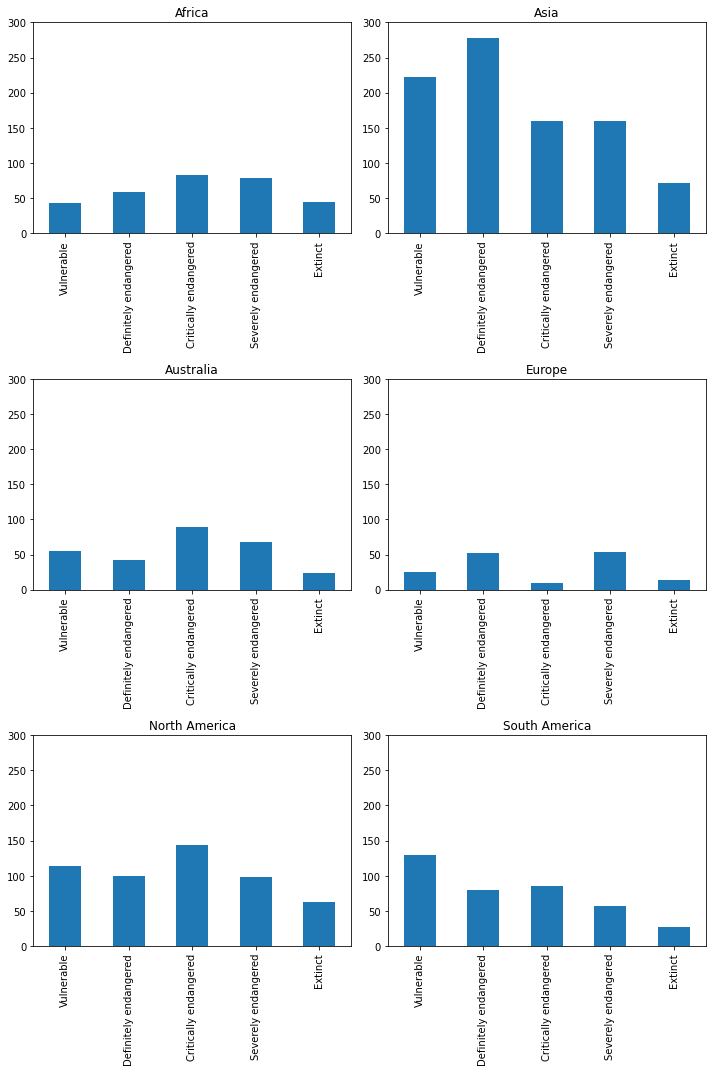

In [368]:
# We want to plot five bars—one for each "Degree"—and to do so for six plots—one for each continent.
fig, axs = plt.subplots(3, 2, figsize=(10,15))

# At the top level, this for loop pairs each continent name with one of the six subplots.
# At the second level loop, it goes through each of the five "Degrees of endangerment"
# For this loop, we can use the "degrees" list made above.
# Within each loop, it sums each of the five "Degree of endangerment" columns for that continent.
# Finally, it graphs those sums.
for continent, ax in zip(continent_names, axs.flatten()):
    lang_sum = endangered_df.loc[endangered_df['Country'].isin(continent_lists[continent]), 
                                 [degree for degree in degrees]].sum()
    lang_sum.plot(ax=ax, kind='bar')
    ax.set_ylim(0,300)  # To normalize scale across plots
    ax.set_title(continent)

fig.tight_layout()

## Data Analysis

This dataset is not conducive to regression analysis.
What, after all, would it predict?
With additional data, we could imagine some models:
If it had change in the number of speakers over time, then we could predict which languages are likely to go extinct based on past trends and geographical location.
If the dataset had total population for each country or, even better, if it had the density of speakers of the language relative to other (esp. non-endangered) languages in the same region, then we could get a better sense of how these languages are used.
For instance, are they endangered because that community's geographical place is endangered?
Or are they endangered because they are spoken in addition to a dominant language in the region?

With the above visualizations, *if* someone speaks an endangered language, then it is easy to see in which continent one is more likely to speak a Vulnerable language (South America) than another degree of endangerment.
But that's trivial.
Languages are complex socio-technical practices with intersecting histories and are situated within a diversity of contexts; mathematical abstraction is comparatively simple.

### Hypothetical Logistic Regression

The following cells show the steps to take for training a logistic regression model that would predict whether a language spoken at Latitude and Longitude coordinates is extinct.

In [369]:
# imports for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [370]:
# Create a training dataset.
# Note that the null values need to be excluded as well as the duplicate rows (due to the 'Country' column).
train_df = endangered_df[['Name in English', 'Latitude', 'Longitude', 'Extinct']]
train_df = train_df.dropna(how='any', axis=0)
train_df = train_df[~train_df.index.duplicated(keep='first')]

In [371]:
# Use SciKit-Learn's train_test_split method to split the dataframe into 
# training and testing DataFrames and Series
x_train, x_test, y_train, y_test = train_test_split(train_df[['Latitude', 'Longitude']],
                                                    train_df['Extinct'], test_size = .20, shuffle=True)

In [372]:
# Create a logistic regression object and then model it on the training data
logReg = LogisticRegression(C=1e15, solver='liblinear')

logReg.fit(x_train, y_train)

LogisticRegression(C=1000000000000000.0, solver='liblinear')

In [373]:
# Look at the resulting model's logistic regression equation
print(logReg.intercept_)  # the C_0 value
print(logReg.coef_)  # the coefficients

print(x_train.columns)  # columns to which the coefficients correspond

print("\n The equation:\n")
equation = '{:.8f}'.format(logReg.intercept_[0])
for (coef, feature) in zip(logReg.coef_[0], x_train.columns):
    equation += ' + {:.8f}({})'.format(coef, feature)
print(equation)

[-2.40242822]
[[ 0.00716992 -0.00100992]]
Index(['Latitude', 'Longitude'], dtype='object')

 The equation:

-2.40242822 + 0.00716992(Latitude) + -0.00100992(Longitude)


In [374]:
# To test the accuracy of the model, use scikit-learn's accuracy_score method.
# First, use the model to predict the training data.
# In concrete terms, the model assesses whether the languages spoken at Latitude and Longitude
# of x_train's data are extinct (all the 1 values in y_train).
pred_train = logReg.predict(x_train)
train_data_accuracy = accuracy_score(pred_train, y_train)

# Do the same for test data:
pred_test = logReg.predict(x_test)
test_data_accuracy = accuracy_score(pred_test, y_test)

# Print in reader-friendly format:
print('Accuracy of the training data: {:.2f}%'.format(train_data_accuracy*100))
print('Accuracy of the testing data: {:.2f}%'.format(test_data_accuracy*100))

Accuracy of the training data: 90.80%
Accuracy of the testing data: 90.44%


As expected, the model performs better on the training data, but not very much better.

## Conclusion and Recommendations

This dataset requires thorough checking across all of its columns.
For example, a couple of the languages in the list of "18 non-extinct languages with zero speakers" have wrong coordinates for longitude (2428, Mirana, lon=-65.6982; and 2429, Miriti Tapuia, lon=-69.1699) that makes them land in Antartica instead of Brazil.
Tapuia language is/was spoken in northeastern Brazil, close to the Equator.

There are also the seven duplicate language names.
When fixing one ("Ako"), we discovered the incorrect attribution of countries to both as well as a suspect number of speakers for one.

As discussed under the "Data Analysis" section, the dataset does not allow for any finer grained forecasting of probable extinction than already establised by the "Degrees of endangerment" categorization.

Coordinate errors notwithstanding, this dataset does provide a simple map of where endangered and extinct languages are grouped.
We see significant concentrations along the Pacific coast, in Central America, along the Himalayas, in the islands off the coast of southeast Asia, and in subsaharan Africa just north of the equator in and around the Congo River Basin.
These sorts of mappings could inspire such scholars as geographers, anthropologists, and linguists to investigate general conditions for a language's endangerment and extinction.
Since speaking a language is inseparable from ways of living, these regions may foster circumstances that are conducive to lifestyles either detached from or somehow coexistent with the nearby dominant social structures.
For instance, what are the conditions for so many languages spoken along the Pacific coast?
It probably has to do with the political status of First Nations in Canada and the U.S.
By contrast, languages spoken in Siberia may be far enough from Russian city centers to live without risk of a dominant language overtaking the one spoken.
Across the board, the danger of a language's extinction would go hand in hand with the dangers faced by those communities that speak it.
Members of these cultures as well as those knowledgeable about them would likely see this data and be prompted to provide meaningful explanations and connections.